In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import signal
from scipy.fft import fft, fftfreq
import pylab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error

## Import Data
    available paths: 
        - gabi_open_resamp.xlsx
        - gabi_smile_resamp.xlsx
        - C:\\Users\\felixmaldonado\\Documents\\data_mea\\run_pedro_2\\excel_data\\pedro_open_5.xlsx XXX
        - C:\\Users\\felixmaldonado\\Documents\\data_mea\\run_pedro_2\\excel_data\\pedro_smile_1.xlsx Spike in right ocul.
        - C:\\Users\\felixmaldonado\\Documents\\data_mea\\run_pedro_2\\excel_data\\pedro_smile_4.xlsx Spike in right ocul.

In [2]:
df = pd.read_excel('C:\\Users\\felixmaldonado\\Documents\\data_mea\\run_pedro_2\\excel_data\\pedro_smile_4.xlsx')

## Sensor Labels
    EMG 1 = a; left side of face
    EMG 2 = b; right side of face
    Ch a-d = 1-4; a-d, indicated by sensor color

## Characteristics

In [3]:
fs = 2000
t_ttt = df['time'].iloc[-1]
N_samples = fs*t_ttt

char = {
  "seconds": t_ttt,
  "N": N_samples,
  "fs": fs
}
print(char)

{'seconds': 36.49500000000004, 'N': 72990.00000000009, 'fs': 2000}


## Call and Assign variables for EMG and convert to microV 

In [4]:
# df_mean = df.apply(lambda x:x - x.mean()) # removing mean bias
# df_mean['time'] = df['time']
# df = df_mean

time = df['time']

emg1 = df['a1']*(10**6)
emg2 = df['a2']*(10**6)
emg3 = df['a3']*(10**6)
emg4 = df['a4']*(10**6)
left_side = [emg1,emg2,emg3,emg4]

emg5 = df['b1']*(10**6)
emg6 = df['b2']*(10**6)
emg7 = df['b3']*(10**6)
emg8 = df['b4']*(10**6)
right_side = [emg4,emg5,emg6,emg7]

m1 = "Dep. anguli oris"
m2 = "Orbicularis Oris (l)"
m3 = "Zyg. Major"
m4 = "Orbiculis Oculi"

a1 = "L.Dep. anguli oris"
a2 = "L.Orbicularis Oris (l)"
a3 = "L.Zyg. Major"
a4 = "L.Orbiculis Oculi"

b1 = "R.Dep. anguli oris"
b2 = "R.Orbicularis Oris (l)"
b3 = "R.Zyg. major"
b4 = "R.Orbiculis Oculi"

l = "left"
r = "right"

In [5]:
def despike(yi, th=5.e-8):
  y = np.copy(yi) # use y = y1 if it is OK to modify input array
  n = len(y)
  x = np.arange(n)
  c = np.argmax(y)
  d = abs(np.diff(y))
  try:
    l = c - 1 - np.where(d[c-1::-1]<th)[0][0]
    r = c + np.where(d[c:]<th)[0][0] + 1
  except: # no spike, return unaltered array
    return y
  # for fit, use area twice wider then the spike
  if (r-l) <= 3:
    l -= 1
    r += 1
  s = int(round((r-l)/2.))
  lx = l - s
  rx = r + s
  # make a gap at spike area
  xgapped = np.concatenate((x[lx:l],x[r:rx]))
  ygapped = np.concatenate((y[lx:l],y[r:rx]))
  # quadratic fit of the gapped array
  z = np.polyfit(xgapped,ygapped,2)
  p = np.poly1d(z)
  y[l:r] = p(x[l:r])
  return y

In [6]:
despike(emg8,th = 200.e-8)

array([ 8.53593492e-09,  6.09553173e-01,  3.04625360e+00, ...,
       -5.64310891e-30,  1.48865893e-30, -3.03564114e-31])

## Plot Raw EMG Data

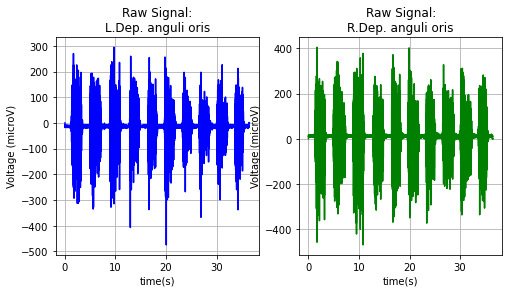

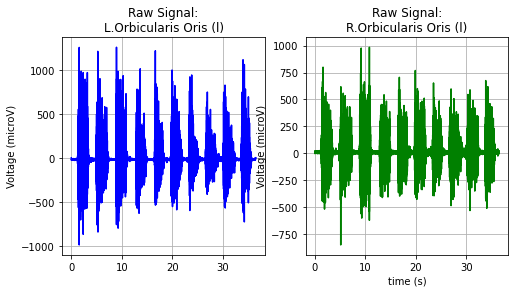

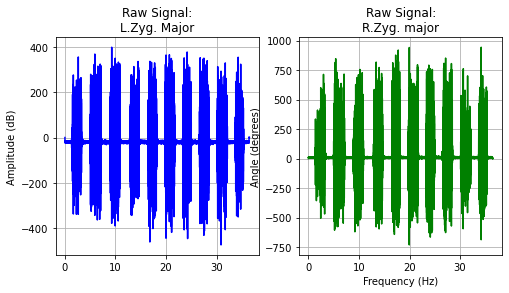

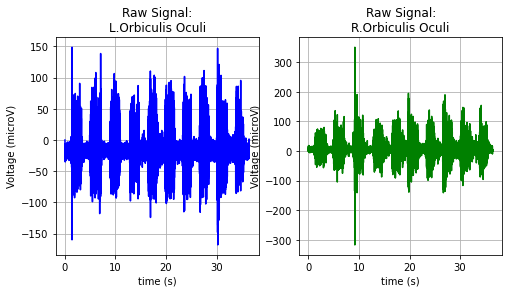

In [7]:
# m1 = "Dep. anguli oris"

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(df['time'], emg1, color='blue',label = '%s'%l)
ax[0].set_title("Raw Signal:" + "\n" + "%s"%a1)
ax[0].set_ylabel("Voltage (microV)")
ax[0].set_xlabel("time(s)")
ax[0].grid()
ax[0].autoscale()

ax[1].plot(df['time'], emg5, color='green', label = '%s'%r)
ax[1].set_title("Raw Signal:" + "\n" + "%s"%b1)
ax[1].set_ylabel("Voltage (microV)")
ax[1].set_xlabel("time(s)")
ax[1].grid()
ax[1].autoscale()

#m2 = "Orbicularis Oris (l)"

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(df['time'], emg2, color='blue',label = '%s'%l)
ax[0].set_title("Raw Signal:" + "\n" + "%s"%a2)
ax[0].set_ylabel("Voltage (microV)")
ax[1].set_xlabel("time (s)")

ax[0].grid()
ax[0].autoscale()

ax[1].plot(df['time'], emg6, color='green', label = '%s'%r)
ax[1].set_title("Raw Signal:" + "\n" + "%s"%b2)
ax[1].set_ylabel("Voltage (microV)")
ax[1].set_xlabel("time (s)")
ax[1].grid()
ax[1].autoscale()

# m3 = "Zyg. Major"

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(df['time'], emg3, color='blue',label = '%s'%l)
ax[0].set_title("Raw Signal:" + "\n" + "%s"%a3)
ax[0].set_ylabel("Amplitude (dB)")
ax[0].grid()
ax[0].autoscale()

ax[1].plot(df['time'], emg7, color='green', label = '%s'%r)
ax[1].set_title("Raw Signal:" + "\n" + "%s"%b3)
ax[1].set_ylabel("Angle (degrees)")
ax[1].set_xlabel("Frequency (Hz)")
ax[1].grid()
ax[1].autoscale()

# m4 = "Orbiculis Oculi"
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(df['time'], emg4, color='blue',label = '%s'%l)
ax[0].set_title("Raw Signal:" + "\n" + "%s"%a4)
ax[0].set_ylabel("Voltage (microV)")
ax[0].set_xlabel("time (s)")
ax[0].grid()
ax[0].autoscale()

ax[1].plot(df['time'], emg8, color='green', label = '%s'%r)
ax[1].set_title("Raw Signal:" + "\n" + "%s"%b4)
ax[1].set_ylabel("Voltage (microV)")
ax[1].set_xlabel("time (s)")
ax[1].grid()
ax[1].autoscale()

## Design Bandpass Filter

In [8]:
df.head()

,time,a1,a2,a3,a4,b1,b2,b3,b4
0,0.000,-2.629068e-14,-3.311942e-14,-3.858242e-14,-2.424205e-14,2.116912e-14,2.731499e-14,2.219343e-14,8.535935e-15
1,0.001,-1.903307e-06,-2.384531e-06,-2.786572e-06,-1.728363e-06,1.527607e-06,1.978109e-06,1.606633e-06,6.095532e-07
2,0.002,-1.510286e-05,-1.698767e-05,-2.103164e-05,-9.831844e-06,1.114862e-05,1.578037e-05,1.266687e-05,3.046254e-06
3,0.003,-1.287351e-05,-1.442222e-05,-1.963060e-05,-1.038994e-05,9.465294e-06,1.585447e-05,1.129801e-05,-1.734015e-06
4,0.004,-1.220576e-05,-1.430617e-05,-2.162903e-05,-1.932863e-05,1.313039e-05,1.531630e-05,1.181928e-05,3.170968e-06


In [9]:
# process EMG signal: filter EMG BANDPASS
low_band = 1
high_band = 400
order_bp = 2
z1, w1 = sp.signal.bessel(order_bp, [low_band,high_band], btype='bandpass',analog = False, output= 'ba', fs = 2000)

## Bandpass Filter Response 
    NEED: Hass error - "dividing by 0"
    -dbode analog TF 

C:\Anaconda\envs\py36\lib\site-packages\scipy\signal\ltisys.py:3837: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


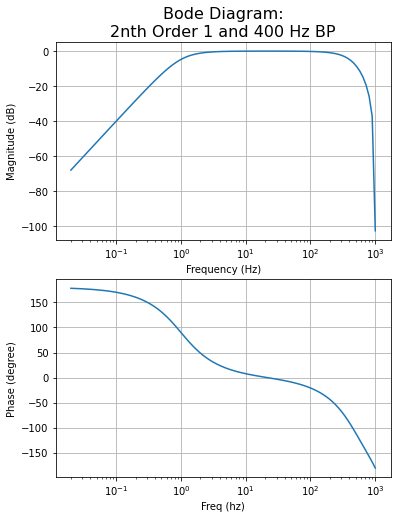

In [10]:
sys_bp = signal.dlti(z1, w1, dt = 1/fs)
w_bp, mag_bp, phase_bp = signal.dbode(sys_bp, w = np.logspace(-2,3,100)*2*np.pi)
w_bp, mag_bp, phase_bp = sys_bp.bode(w = (np.logspace(-2,2.7,100)*2*np.pi)/(fs/2))
fs = 2000

low_cut = low_band
high_cut = high_band


freq_bp = w_bp/(2*np.pi)

fig, ax = plt.subplots(2,1,figsize = (6,8))
ax[0].semilogx(freq_bp, mag_bp)  
ax[0].set_title(r'Bode Diagram:'+ '\n' + '%snth Order %s and %s Hz BP'%(order_bp,low_band,high_band), fontsize=16)
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude (dB)')
#ax[0].autoscale()
ax[0].grid()

ax[1].semilogx(freq_bp, phase_bp) 
ax[1].set_ylabel("Phase (degree)")
ax[1].set_xlabel("Freq (hz)")
#ax[1].autoscale()
ax[1].grid()
plt.show()

## Apply Bandpass Filter

In [11]:
fs = 2000

band_a1 = sp.signal.filtfilt(z1, w1, emg1)
band_a2 = sp.signal.filtfilt(z1, w1, emg2)
band_a3 = sp.signal.filtfilt(z1, w1, emg3)
band_a4 = sp.signal.filtfilt(z1, w1, emg4)
band_b1 = sp.signal.filtfilt(z1, w1, emg5)
band_b2 = sp.signal.filtfilt(z1, w1, emg6)
band_b3 = sp.signal.filtfilt(z1, w1, emg7)
band_b4 = sp.signal.filtfilt(z1, w1, emg8)


## Comparison: Bandpassed left vs. right

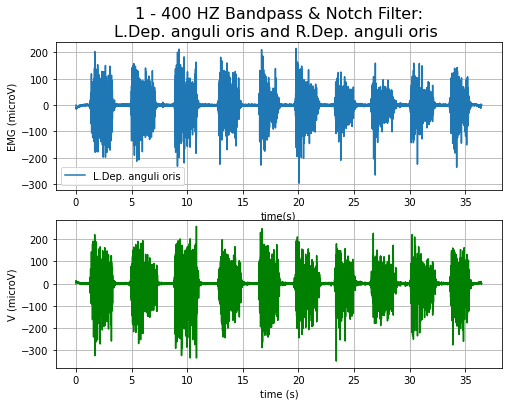

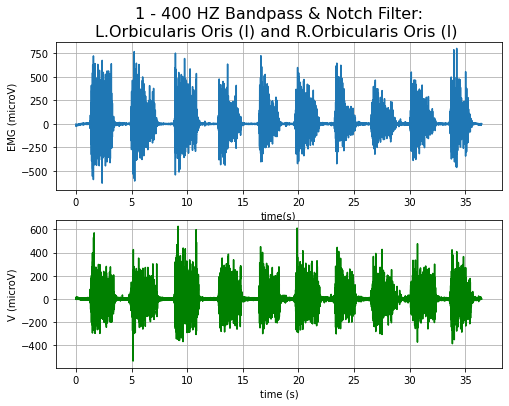

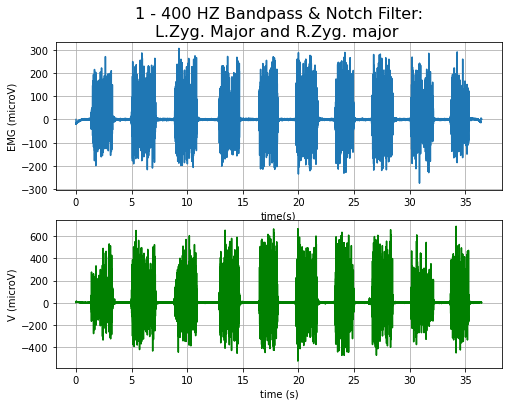

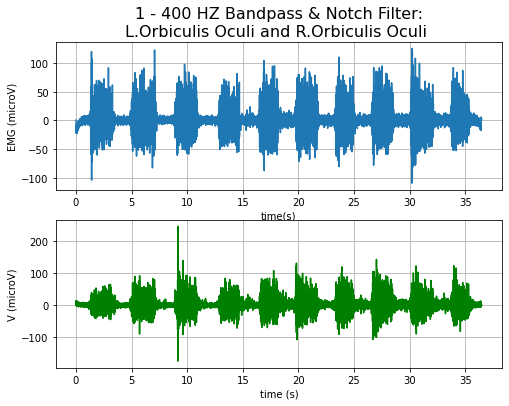

In [12]:

# process EMG signal: filter EMG LOWPASS
fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], band_a1,label = "%s"%a1)
ax[0].set_title(r'%s - %s HZ Bandpass & Notch Filter:'%(low_band,high_band)+ '\n' + '%s and %s '%(a1,b1), fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].legend()
ax[0].grid()

ax[1].plot(df['time'], band_b1,'g')
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()

fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], band_a2)
ax[0].set_title(r'%s - %s HZ Bandpass & Notch Filter:'%(low_band,high_band)+ '\n' + '%s and %s '%(a2,b2), fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()

ax[1].plot(df['time'], band_b2,'g')
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()

fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], band_a3)
ax[0].set_title(r'%s - %s HZ Bandpass & Notch Filter:'%(low_band,high_band)+ '\n' + '%s and %s '%(a3,b3), fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()

ax[1].plot(df['time'], band_b3,'g')
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()

fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], band_a4)
ax[0].set_title(r'%s - %s HZ Bandpass & Notch Filter:'%(low_band,high_band)+ '\n' + '%s and %s '%(a4,b4), fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()

ax[1].plot(df['time'], band_b4,'g')
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
plt.show()

## Rectifying Signal

In [13]:
# rectify bandpassed signal 
abs_a1 = np.abs(band_a1)
abs_a2 = np.abs(band_a2)
abs_a3 = np.abs(band_a3)
abs_a4 = np.abs(band_a4)
abs_b1 = np.abs(band_b1)
abs_b2 = np.abs(band_b2)
abs_b3 = np.abs(band_b3)
abs_b4 = np.abs(band_b4)

## Rectified Signal Plot

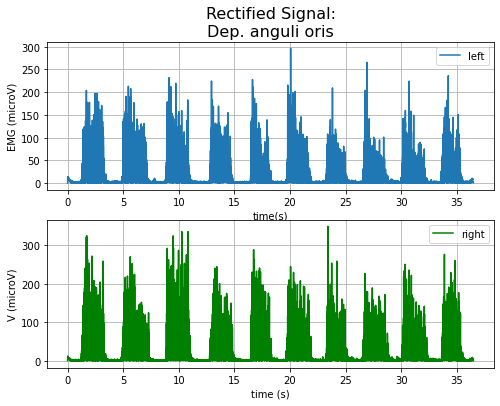

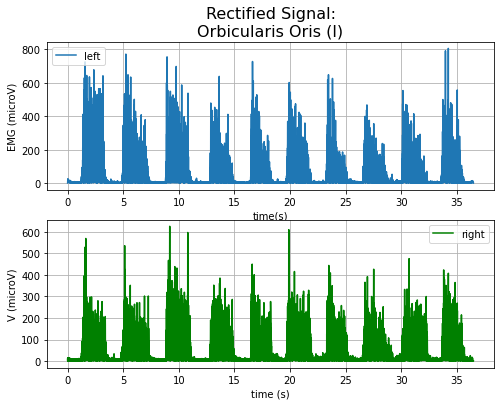

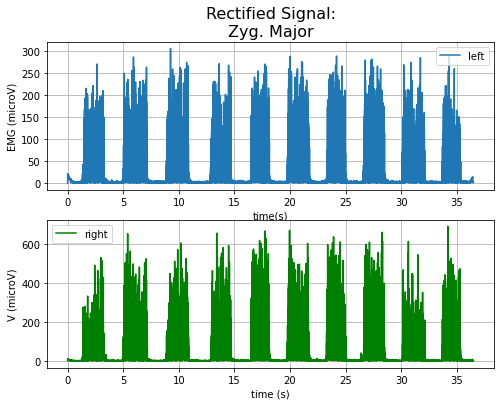

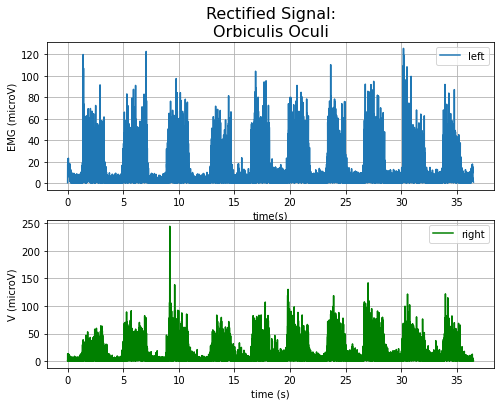

In [14]:
fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], abs_a1, label = '%s'%l)
ax[0].set_title(r'Rectified Signal:'+ '\n' + '%s'%m1, fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()
leg = ax[0].legend()

ax[1].plot(df['time'], abs_b1,'g',label = '%s'%r)
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
leg = ax[1].legend()

fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], abs_a2, label = '%s'%l)
ax[0].set_title(r'Rectified Signal:'+ '\n' + '%s'%m2, fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()
leg = ax[0].legend()

ax[1].plot(df['time'], abs_b2,'g',label = '%s'%r)
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
leg = ax[1].legend()

fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], abs_a3, label = '%s'%l)
ax[0].set_title(r'Rectified Signal:'+ '\n' + '%s'%m3, fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()
leg = ax[0].legend()

ax[1].plot(df['time'], abs_b3,'g',label = '%s'%r)
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
leg = ax[1].legend()

fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], abs_a4, label = '%s'%l)
ax[0].set_title(r'Rectified Signal:'+ '\n' + '%s'%m4, fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()
leg = ax[0].legend()

ax[1].plot(df['time'], abs_b4,'g',label = '%s'%r)
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
leg = ax[1].legend()

plt.show()

## Design Lowpass Filter - 2nd Order Bessel 

In [15]:
fc_low = 25
fs = 2000
lp_order = 2
z2, w2 = sp.signal.bessel(lp_order, Wn = fc_low/ (fs / 2), btype = 'lowpass')

## Lowpass Bode Plot

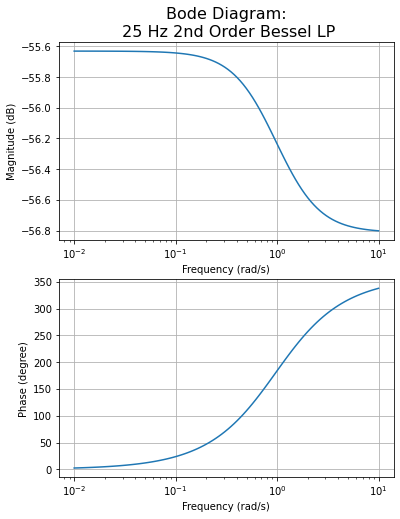

In [16]:
sys = signal.TransferFunction(z2, w2)
w, mag, phase = signal.bode(sys)

fig, ax = plt.subplots(2,1,figsize = (6,8))
ax[0].semilogx(w, mag)  
ax[0].set_title(r'Bode Diagram:'+ '\n' + ' %s Hz 2nd Order Bessel LP'%fc_low, fontsize=16)
ax[0].set_xlabel('Frequency (rad/s)')
ax[0].set_ylabel('Magnitude (dB)')
ax[0].autoscale()
ax[0].grid()

ax[1].semilogx(w, phase) 
ax[1].set_ylabel("Phase (degree)")
ax[1].set_xlabel("Frequency (rad/s)")
ax[1].autoscale()
ax[1].grid()
plt.show()

## Apply Lowpass Filter
    apply with filtfilt, double-pass 0 lag. 

In [17]:
#Apply filter
filt_a1 = sp.signal.filtfilt(z2, w2, abs_a1)
filt_a2 = sp.signal.filtfilt(z2, w2, abs_a2)
filt_a3 = sp.signal.filtfilt(z2, w2, abs_a3)
filt_a4 = sp.signal.filtfilt(z2, w2, abs_a4)
filt_b1 = sp.signal.filtfilt(z2, w2, abs_b1)
filt_b2 = sp.signal.filtfilt(z2, w2, abs_b2)
filt_b3 = sp.signal.filtfilt(z2, w2, abs_b3)
filt_b4 = sp.signal.filtfilt(z2, w2, abs_b4)

## Rectified vs Lowpassed
    (next step, basically)

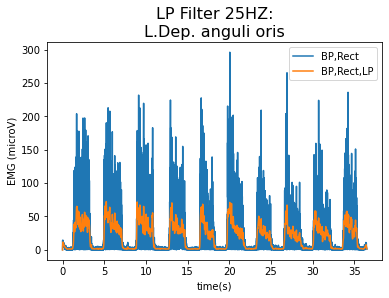

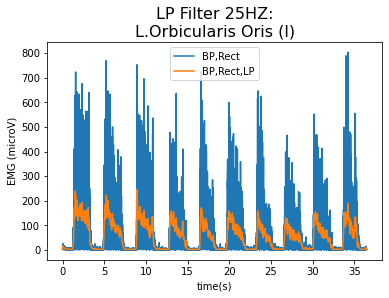

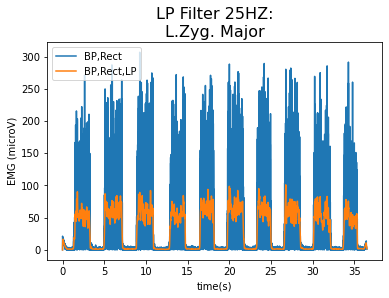

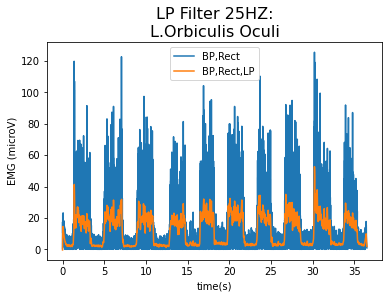

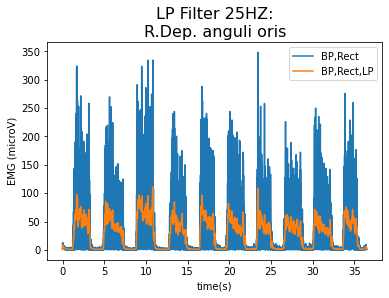

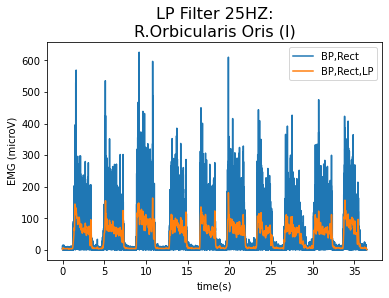

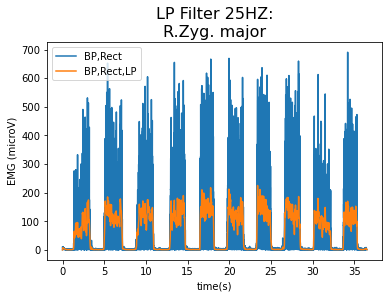

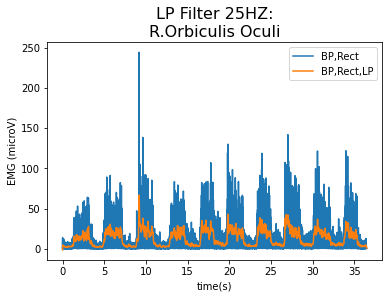

In [18]:
#BP + Rectified,and BP + LP signal

fig, ax = plt.subplots()
ax.plot(df['time'], abs_a1,label = 'BP,Rect')
ax.plot(df['time'], filt_a1,label = 'BP,Rect,LP')
ax.set_title(r'LP Filter %sHZ:'%fc_low+ '\n' + '%s'%a1, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], abs_a2,label = 'BP,Rect')
ax.plot(df['time'], filt_a2,label = 'BP,Rect,LP')
ax.set_title(r'LP Filter %sHZ:'%fc_low+ '\n' + '%s'%a2, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], abs_a3,label = 'BP,Rect')
ax.plot(df['time'], filt_a3,label = 'BP,Rect,LP')
ax.set_title(r'LP Filter %sHZ:'%fc_low+ '\n' + '%s'%a3, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], abs_a4,label = 'BP,Rect')
ax.plot(df['time'], filt_a4,label = 'BP,Rect,LP')
ax.set_title(r'LP Filter %sHZ:'%fc_low+ '\n' + '%s'%a4, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], abs_b1,label = 'BP,Rect')
ax.plot(df['time'], filt_b1,label = 'BP,Rect,LP')
ax.set_title(r'LP Filter %sHZ:'%fc_low+ '\n' + '%s'%b1, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], abs_b2,label = 'BP,Rect')
ax.plot(df['time'], filt_b2,label = 'BP,Rect,LP')
ax.set_title(r'LP Filter %sHZ:'%fc_low+ '\n' + '%s'%b2, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], abs_b3,label = 'BP,Rect')
ax.plot(df['time'], filt_b3,label = 'BP,Rect,LP')
ax.set_title(r'LP Filter %sHZ:'%fc_low+ '\n' + '%s'%b3, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], abs_b4,label = 'BP,Rect')
ax.plot(df['time'], filt_b4,label = 'BP,Rect,LP')
ax.set_title(r'LP Filter %sHZ:'%fc_low+ '\n' + '%s'%b4, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()
plt.show()

## Lowpassed Signal Comparison by Muscle Group

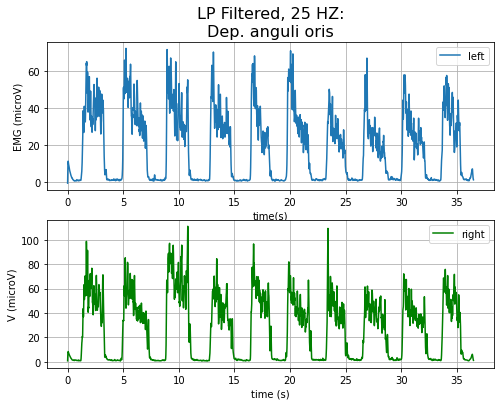

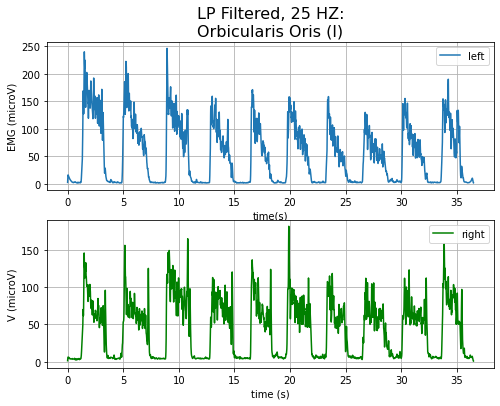

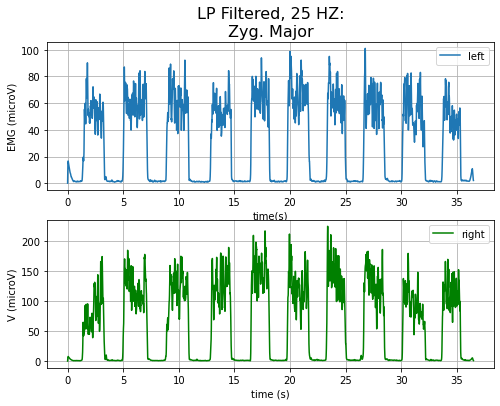

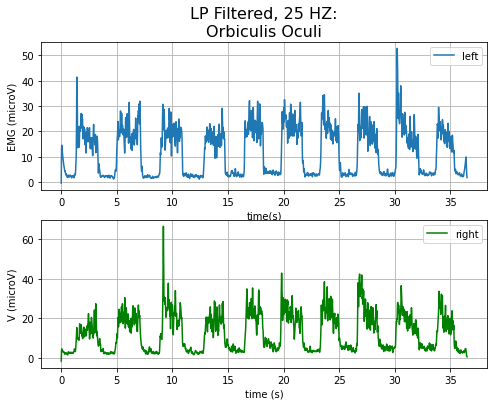

In [19]:
fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], filt_a1, label = '%s'%l)
ax[0].set_title(r'LP Filtered, %s HZ:'%fc_low+ '\n' + '%s'%m1, fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()
leg = ax[0].legend()

ax[1].plot(df['time'], filt_b1,'g',label = '%s'%r)
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
leg = ax[1].legend()

fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], filt_a2, label = '%s'%l)
ax[0].set_title(r'LP Filtered, %s HZ:'%fc_low+ '\n' + '%s'%m2, fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()
leg = ax[0].legend()

ax[1].plot(df['time'], filt_b2,'g',label = '%s'%r)
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
leg = ax[1].legend()

fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], filt_a3, label = '%s'%l)
ax[0].set_title(r'LP Filtered, %s HZ:'%fc_low+ '\n' + '%s'%m3, fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()
leg = ax[0].legend()

ax[1].plot(df['time'], filt_b3,'g',label = '%s'%r)
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
leg = ax[1].legend()

fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], filt_a4, label = '%s'%l)
ax[0].set_title(r'LP Filtered, %s HZ:'%fc_low+ '\n' + '%s'%m4, fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()
leg = ax[0].legend()

ax[1].plot(df['time'], filt_b4,'g',label = '%s'%r)
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
leg = ax[1].legend()

plt.show()

## Linear Envelope Method 2: RMS

In [20]:
window_size = 100
window = np.ones(window_size)/float(window_size)

#calculate the RMSE and RMS of all channels
rmse_a1 = mean_squared_error(band_a1,[0 for _ in band_a1], squared=False)
rms_a1 = np.sqrt(np.convolve(band_a1**2,window,'same'))

rmse_a2 = mean_squared_error(band_a2,[0 for _ in band_a2], squared=False)
rms_a2 = np.sqrt(np.convolve(band_a2**2,window,'same'))

rmse_a3 = mean_squared_error(band_a3,[0 for _ in band_a3], squared=False)
rms_a3 = np.sqrt(np.convolve(band_a3**2,window,'same'))

rmse_a4 = mean_squared_error(band_a4,[0 for _ in band_a4], squared=False)
rms_a4 = np.sqrt(np.convolve(band_a4**2,window,'same'))

rmse_b1 = mean_squared_error(band_b1,[0 for _ in band_b1], squared=False)
rms_b1 = np.sqrt(np.convolve(band_b1**2,window,'same'))

rmse_b2 = mean_squared_error(band_b2,[0 for _ in band_b2], squared=False)
rms_b2 = np.sqrt(np.convolve(band_b2**2,window,'same'))

rmse_b3 = mean_squared_error(band_b3,[0 for _ in band_b3], squared=False)
rms_b3 = np.sqrt(np.convolve(band_b3**2,window,'same'))

rmse_b4 = mean_squared_error(band_b4,[0 for _ in band_b4], squared=False)
rms_b4 = np.sqrt(np.convolve(band_b4**2,window,'same'))

## Plot RMS 

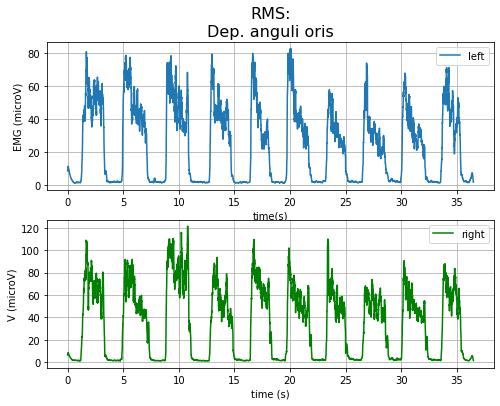

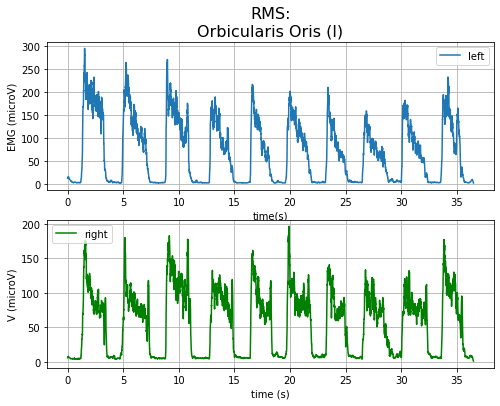

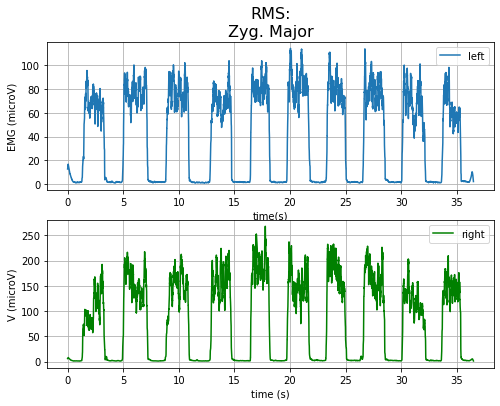

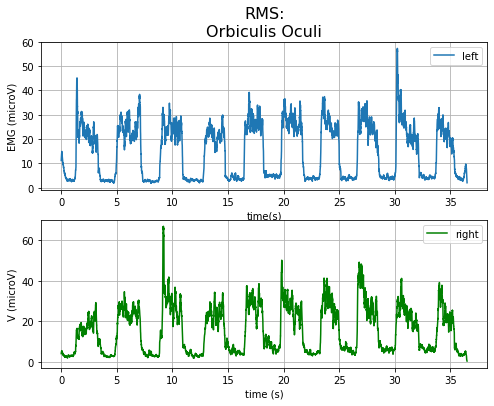

In [21]:
fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], rms_a1, label = '%s'%l)
ax[0].set_title(r'RMS:'+ '\n' + '%s'%m1, fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()
leg = ax[0].legend()

ax[1].plot(df['time'], rms_b1,'g',label = '%s'%r)
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
leg = ax[1].legend()

fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], rms_a2, label = '%s'%l)
ax[0].set_title(r'RMS:'+ '\n' + '%s'%m2, fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()
leg = ax[0].legend()

ax[1].plot(df['time'], rms_b2,'g',label = '%s'%r)
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
leg = ax[1].legend()

fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], rms_a3, label = '%s'%l)
ax[0].set_title(r'RMS:'+ '\n' + '%s'%m3, fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()
leg = ax[0].legend()

ax[1].plot(df['time'], rms_b3,'g',label = '%s'%r)
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
leg = ax[1].legend()

fig, ax = plt.subplots(2,1,figsize = (8,6))
ax[0].plot(df['time'], rms_a4, label = '%s'%l)
ax[0].set_title(r'RMS:'+ '\n' + '%s'%m4, fontsize=16)
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('EMG (microV)')
ax[0].autoscale()
ax[0].grid()
leg = ax[0].legend()

ax[1].plot(df['time'], rms_b4,'g',label = '%s'%r)
ax[1].set_ylabel("V (microV)")
ax[1].set_xlabel("time (s)")
ax[1].autoscale()
ax[1].grid()
leg = ax[1].legend()

plt.show()

## Comparing Linear Envelope Methods: RMS vs LP - Same Side
    #had to remove of L Orbicularis Oris 1.5 seconds due to large spike

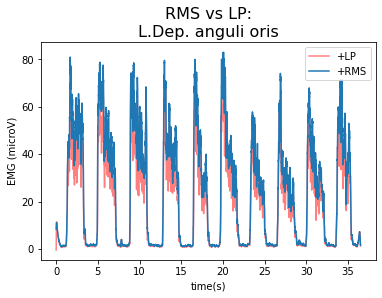

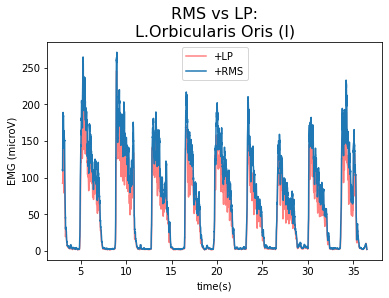

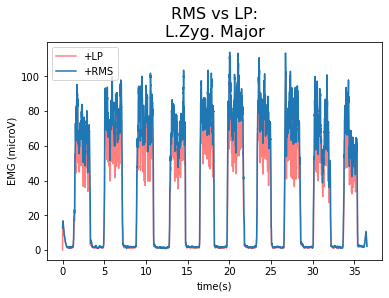

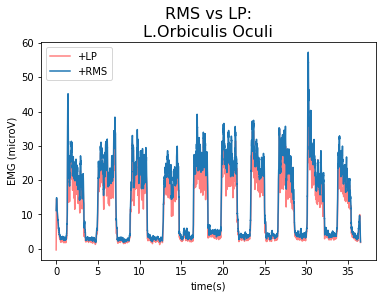

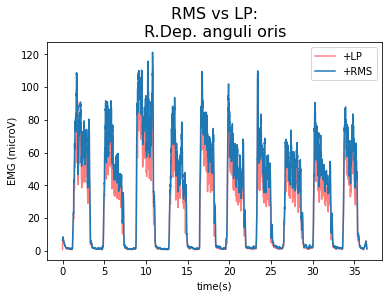

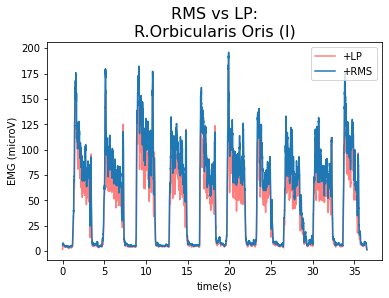

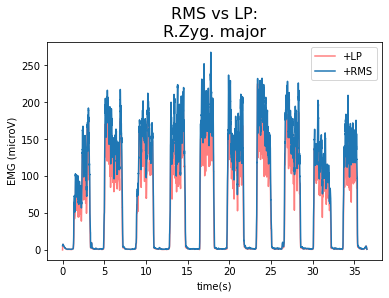

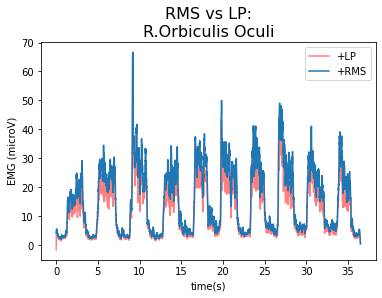

In [22]:
window_size = 100
window = np.ones(window_size)/float(window_size)

fig, ax = plt.subplots()
ax.plot(df['time'], filt_a1,'r',alpha=0.5,label = "+LP")
ax.plot(df['time'], rms_a1, label = '+RMS')
ax.set_title(r'RMS vs LP:'+'\n' '%s'%a1, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][3000::], filt_a2[3000::],'r',alpha=0.5,label = "+LP")
ax.plot(df['time'][3000::], rms_a2[3000::],label = '+RMS')
ax.set_title(r'RMS vs LP:'+'\n' '%s'%a2, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], filt_a3,'r',alpha=0.5,label = "+LP")
ax.plot(df['time'], rms_a3, label = '+RMS')
ax.set_title(r'RMS vs LP:'+'\n' '%s'%a3, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], filt_a4,'r',alpha=0.5,label = "+LP")
ax.plot(df['time'], rms_a4, label = '+RMS')
ax.set_title(r'RMS vs LP:'+'\n' '%s'%a4, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], filt_b1,'r',alpha=0.5,label = "+LP")
ax.plot(df['time'], rms_b1,label = '+RMS')
ax.set_title(r'RMS vs LP:'+'\n' '%s'%b1, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], filt_b2,'r',alpha=0.5,label = "+LP")
ax.plot(df['time'], rms_b2,label = '+RMS')
ax.set_title(r'RMS vs LP:'+'\n' '%s'%b2, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], filt_b3,'r',alpha=0.5,label = "+LP")
ax.plot(df['time'], rms_b3,label = '+RMS')
ax.set_title(r'RMS vs LP:'+'\n' '%s'%b3, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], filt_b4,'r',alpha=0.5,label = "+LP")
ax.plot(df['time'], rms_b4,label = '+RMS')
ax.set_title(r'RMS vs LP:'+'\n' '%s'%b4, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

## Comparison Plot: Bandpass - L/R

window_size = 250
window = np.ones(window_size)/float(window_size)

fig, ax = plt.subplots()
ax.plot(df['time'], filt_a1,'r',alpha=0.5,label = "Left")
ax.plot(df['time'], filt_b1,label = 'Right')
ax.set_title(r'LP Filter %s HZ:'%fc_low+ '\n' + '%s & %s'%(a1,b1), fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

ax.set_title(r'LP Filter %s HZ:'%fc_low+ '\n' + '%s & %s'%(a1,b1), fontsize=16)

fig, ax = plt.subplots()
ax.plot(df['time'], filt_a2,'r',alpha=0.5,label = "Left")
ax.plot(df['time'], filt_b2,label = 'Right')
ax.set_title(r'LP Filter %s HZ:'%fc_low+ '\n' + '%s & %s'%(a2,b2), fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], filt_a3,'r',alpha=0.5,label = "+Left")
ax.plot(df['time'], filt_b3,label = 'Right')
ax.set_title(r'LP Filter %s HZ:'%fc_low+ '\n' + '%s & %s'%(a3,b3), fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'], filt_a4,'r',alpha=0.5,label = "Left")
ax.plot(df['time'], filt_b4,label = 'Right')
ax.set_title(r'LP Filter %s HZ:'%fc_low+ '\n' + '%s & %s'%(a4,b4), fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

## Comparison Plot: RMS - L/R

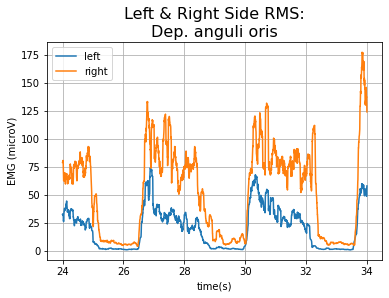

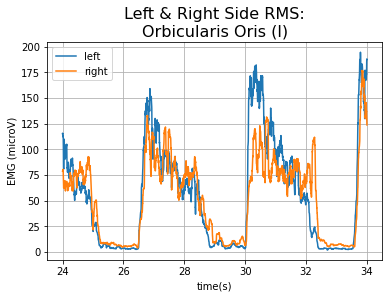

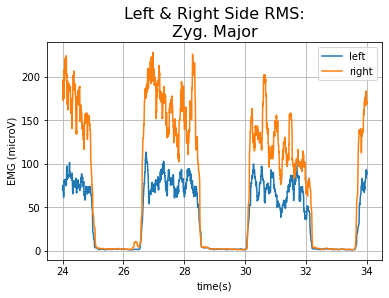

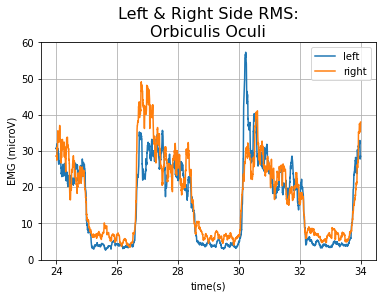

In [23]:

window_size = 250
window = np.ones(window_size)/float(window_size)

fs = 2000
t_low = 12
t_high = 17

i = t_low*fs
j = t_high*fs

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], rms_a1[i:j],label = '%s'%l)
ax.plot(df['time'][i:j], rms_b2[i:j],label = '%s'%r)
ax.set_title(r'Left & Right Side RMS:'+ '\n' + '%s'%m1, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
ax.grid()
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], rms_a2[i:j],label = '%s'%l)
ax.plot(df['time'][i:j], rms_b2[i:j],label = '%s'%r)
ax.set_title(r'Left & Right Side RMS:'+ '\n' + '%s'%m2, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], rms_a3[i:j],label = '%s'%l)
ax.plot(df['time'][i:j], rms_b3[i:j],label = '%s'%r)
ax.set_title(r'Left & Right Side RMS:'+ '\n' + '%s'%m3, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], rms_a4[i:j],label = '%s'%l)
ax.plot(df['time'][i:j], rms_b4[i:j],label = '%s'%r)
ax.set_title(r'Left & Right Side RMS:'+ '\n' + '%s'%m4, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.autoscale()

## RMS vs LP - Single Event Comparison - same side
    Select lower-upper time frames

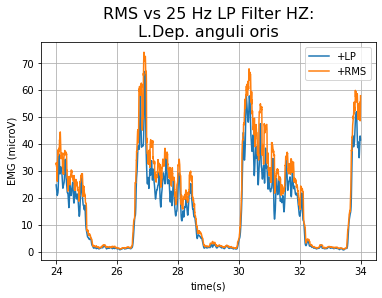

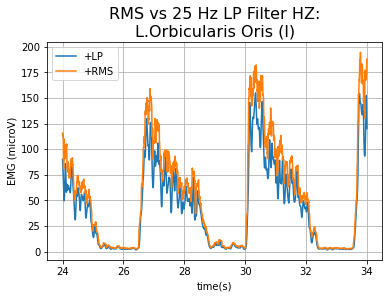

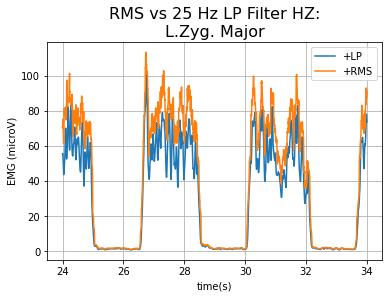

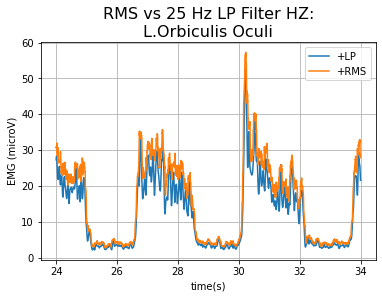

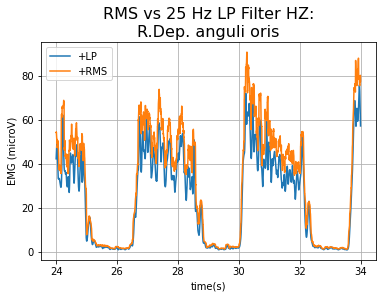

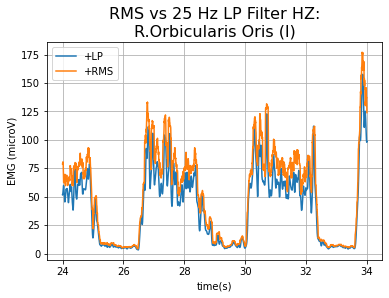

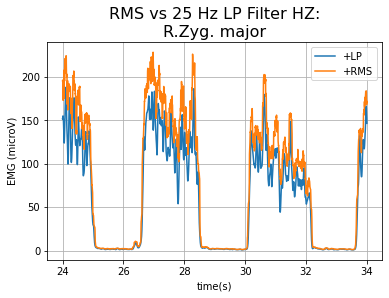

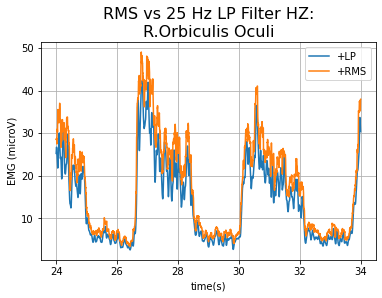

In [24]:
window_size = 250
window = np.ones(window_size)/float(window_size)

fs = 2000
t_low = 12
t_high = 17

i = t_low*fs
j = t_high*fs

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], filt_a1[i:j],label = '+LP')
ax.plot(df['time'][i:j], rms_a1[i:j],label = '+RMS')
ax.set_title(r'RMS vs %s Hz LP Filter HZ:'%fc_low+ '\n' + '%s'%a1, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], filt_a2[i:j],label = '+LP')
ax.plot(df['time'][i:j], rms_a2[i:j],label = '+RMS')
ax.set_title(r'RMS vs %s Hz LP Filter HZ:'%fc_low+ '\n' + '%s'%a2, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], filt_a3[i:j],label = "+LP")
ax.plot(df['time'][i:j], rms_a3[i:j],label = '+RMS')
ax.set_title(r'RMS vs %s Hz LP Filter HZ:'%fc_low+ '\n' + '%s'%a3, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], filt_a4[i:j],label = "+LP")
ax.plot(df['time'][i:j], rms_a4[i:j],label = '+RMS')
ax.set_title(r'RMS vs %s Hz LP Filter HZ:'%fc_low+ '\n' + '%s'%a4, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], filt_b1[i:j],label = "+LP")
ax.plot(df['time'][i:j], rms_b1[i:j],label = '+RMS')
ax.set_title(r'RMS vs %s Hz LP Filter HZ:'%fc_low+ '\n' + '%s'%b1, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], filt_b2[i:j],label = "+LP")
ax.plot(df['time'][i:j], rms_b2[i:j],label = '+RMS')
ax.set_title(r'RMS vs %s Hz LP Filter HZ:'%fc_low+ '\n' + '%s'%b2, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], filt_b3[i:j],label = "+LP")
ax.plot(df['time'][i:j], rms_b3[i:j],label = '+RMS')
ax.set_title(r'RMS vs %s Hz LP Filter HZ:'%fc_low+ '\n' + '%s'%b3, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], filt_b4[i:j],label = "+LP")
ax.plot(df['time'][i:j], rms_b4[i:j],label = '+RMS')
ax.set_title(r'RMS vs %s Hz LP Filter HZ:'%fc_low+ '\n' + '%s'%b4, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.autoscale()

plt.show()

## Single Event Comparison Plot: RMS vs. Rectified Signal
    Select lower-upper time frames

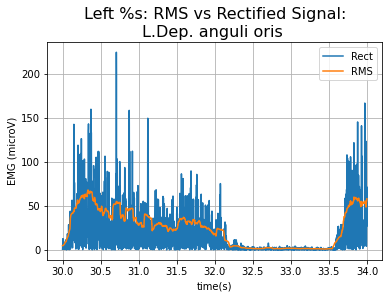

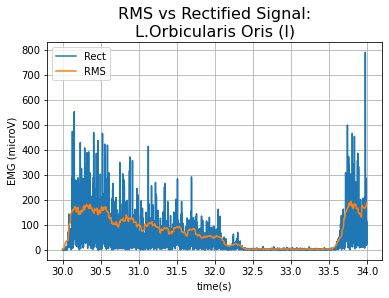

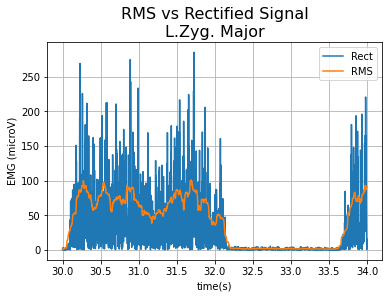

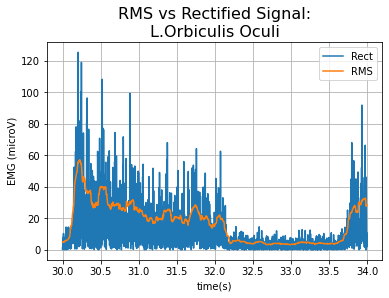

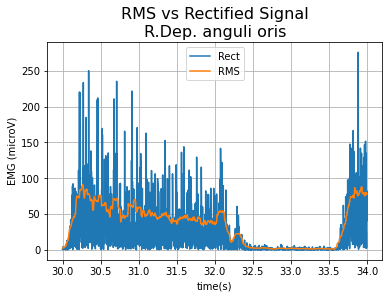

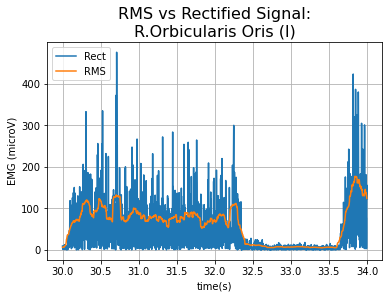

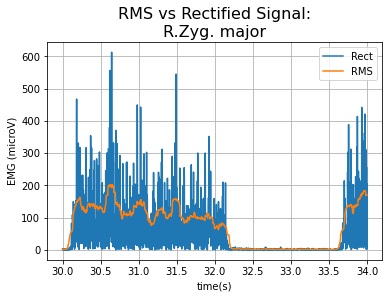

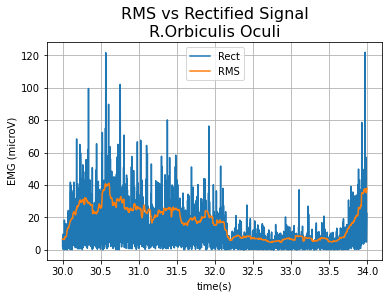

In [25]:
window_size = 100
window = np.ones(window_size)/float(window_size)

fs = 2000
t_low = 15
t_high = 17

i = t_low*fs
j = t_high*fs

r = "Right"
l = "Left"

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], abs_a1[i:j],label = 'Rect')
ax.plot(df['time'][i:j], rms_a1[i:j],label = 'RMS')
ax.set_title(r'Left %s: RMS vs Rectified Signal:'+ '\n' + '%s '%a1, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()
ax.grid()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], abs_a2[i:j],label = 'Rect')
ax.plot(df['time'][i:j], rms_a2[i:j],label = 'RMS')
ax.set_title(r'RMS vs Rectified Signal:' '\n' + '%s'%a2, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()
ax.grid()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], abs_a3[i:j],label = "Rect")
ax.plot(df['time'][i:j], rms_a3[i:j],label = 'RMS')
ax.set_title(r'RMS vs Rectified Signal'+ '\n' + '%s'%a3, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()
ax.grid()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], abs_a4[i:j],label = "Rect")
ax.plot(df['time'][i:j], rms_a4[i:j],label = 'RMS')
ax.set_title(r'RMS vs Rectified Signal:' + '\n' + '%s'%a4, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()
ax.grid()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], abs_b1[i:j],label = "Rect")
ax.plot(df['time'][i:j], rms_b1[i:j],label = 'RMS')
ax.set_title(r'RMS vs Rectified Signal' + '\n' + '%s'%b1, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()
ax.grid()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], abs_b2[i:j],label = "Rect")
ax.plot(df['time'][i:j], rms_b2[i:j],label = 'RMS')
ax.set_title(r'RMS vs Rectified Signal:'+ '\n' + '%s'%b2, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()
ax.grid()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], abs_b3[i:j],label = "Rect")
ax.plot(df['time'][i:j], rms_b3[i:j],label = 'RMS')
ax.set_title(r'RMS vs Rectified Signal:'+ '\n' + '%s'%b3, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()
ax.grid()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], abs_b4[i:j],label = "Rect")
ax.plot(df['time'][i:j], rms_b4[i:j],label = 'RMS')
ax.set_title(r'RMS vs Rectified Signal'+ '\n' + '%s'%b4, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()
ax.grid()

plt.show()

## Comparing LP - same muscle, different side

window_size = 250
window = np.ones(window_size)/float(window_size)

fs = 2000
t_low = 1
t_high = 30

i = t_low*fs
j = t_high*fs

r = "Right"
l = "Left"

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], filt_a1[i:j],label = "%s"%l)
ax.plot(df['time'][i:j], filt_b1[i:j],label = '+%s'%r)
ax.set_title(r'Left and Right %s Hz LP:'%fc_low+ '\n' + '%s'%b1, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], filt_a3[i:j],label = "%s"%l)
ax.plot(df['time'][i:j], filt_b3[i:j],label = '+%s'%r)
ax.set_title(r'Left and Right %s Hz LP:'%fc_low+ '\n' + '%s'%b2, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], filt_a3[i:j],label = "%s"%l)
ax.plot(df['time'][i:j], filt_b3[i:j],label = '%s'%r)
ax.set_title(r'Left and Right %s Hz LP:'%fc_low+ '\n' + '%s'%b3, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

fig, ax = plt.subplots()
ax.plot(df['time'][i:j], filt_a4[i:j],label = '%s'%l)
ax.plot(df['time'][i:j], filt_b4[i:j],label = '%s'%r)
ax.set_title(r'Left and Right %s Hz LP:'%fc_low+ '\n' + '%s'%b4, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.autoscale()

plt.show()

## Comparing RMS Plot - same muscle, different side
    ## do not follow headers, not done yet
    ## add LP only for a side by side

(5.0, 10.0)

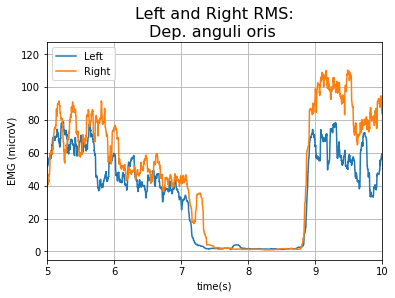

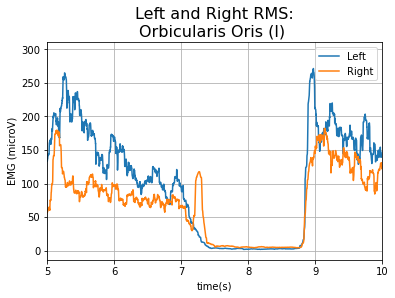

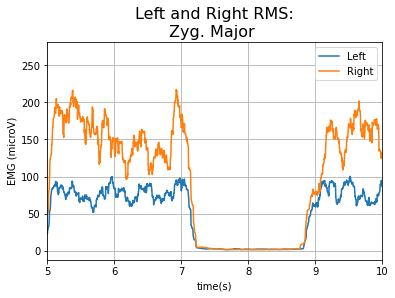

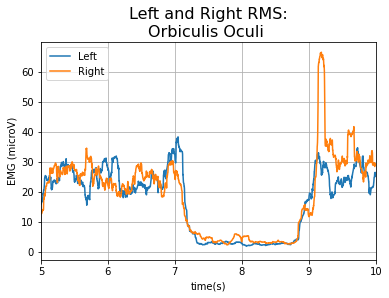

In [26]:
x_lower = 5
x_upper = 10

fig, ax = plt.subplots()
ax.plot(df['time'], rms_a1,label = "%s"%l)
ax.plot(df['time'], rms_b1,label = '%s'%r)
ax.set_title(r'Left and Right RMS:' + '\n' + '%s '%m1, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.set_xlim([x_lower,x_upper])

fig, ax = plt.subplots()
ax.plot(df['time'], rms_a2,label = "%s"%l)
ax.plot(df['time'], rms_b2,label = '%s'%r)
ax.set_title(r'Left and Right RMS:' + '\n' + '%s '%m2, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.set_xlim([x_lower,x_upper])

fig, ax = plt.subplots()
ax.plot(df['time'], rms_a3,label = "%s"%l)
ax.plot(df['time'], rms_b3,label = '%s'%r)
ax.set_title(r'Left and Right RMS:' + '\n' + '%s '%m3, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.set_xlim([x_lower,x_upper])

fig, ax = plt.subplots()
ax.plot(df['time'], rms_a4,label = "%s"%l)
ax.plot(df['time'], rms_b4,label = '%s'%r)
ax.set_title(r'Left and Right RMS:' + '\n' + '%s '%m4, fontsize=16)
ax.set_xlabel('time(s)')
ax.set_ylabel('EMG (microV)')
leg = ax.legend()
ax.grid()
ax.set_xlim([x_lower,x_upper])


In [27]:
import numpy as np
def window_rms(a, window_size):
  a2 = np.power(a,2)
  window = np.ones(window_size)/float(window_size)
  return np.sqrt(np.convolve(a2, window, 'valid'))

In [28]:
rms_new_a1 = window_rms(band_a1,250)

## Comparing Raw vs. Filtered PSD

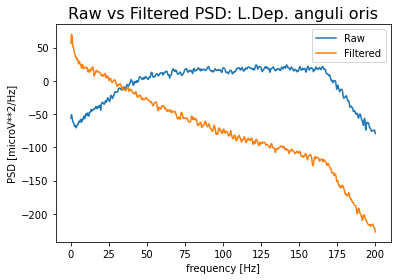

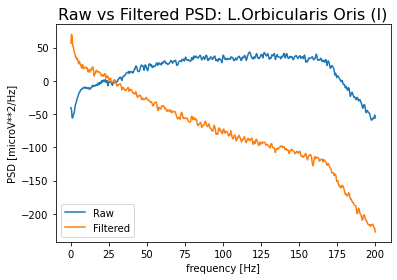

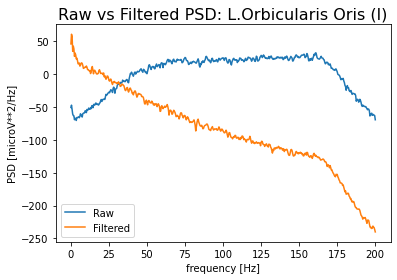

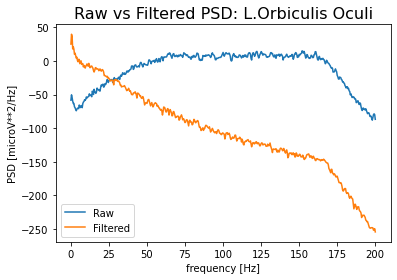

In [29]:
fs = 2000

f1, Pxx_raw_den_a1 = signal.welch(signal.decimate(emg1,5), fs/5, nperseg=1024)
f_filt_a1, Pxx_filt_den_a1 = signal.welch(signal.decimate(filt_a2,5), fs/5, nperseg=1024)

fig, ax = plt.subplots()
ax.plot(f1, 20*np.log10(np.abs(Pxx_raw_den_a1)),label = "Raw" )
ax.plot(f_filt_a1, 20*np.log10(np.abs(Pxx_filt_den_a1)),label = "Filtered")
ax.set_title(r'Raw vs Filtered PSD: %s'%a1, fontsize=16)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [microV**2/Hz]')
leg = ax.legend();

f2, Pxx_raw_den_a2 = signal.welch(signal.decimate(emg2,5), fs/5, nperseg=1024)
f_filt_a2, Pxx_filt_den_a2 = signal.welch(signal.decimate(filt_a2,5), fs/5, nperseg=1024)

fig, ax = plt.subplots()
ax.plot(f2, 20*np.log10(np.abs(Pxx_raw_den_a2)), label = "Raw")
ax.plot(f_filt_a2, 20*np.log10(np.abs(Pxx_filt_den_a2)),label = "Filtered")
ax.set_title(r'Raw vs Filtered PSD: %s'%a2, fontsize=16)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [microV**2/Hz]')
leg = ax.legend();


f3, Pxx_raw_den_a3 = signal.welch(signal.decimate(emg3,5), fs/5, nperseg=1024)
f_filt_a3, Pxx_filt_den_a3 = signal.welch(signal.decimate(filt_a3,5), fs/5, nperseg=1024)

fig, ax = plt.subplots()
ax.plot(f3, 20*np.log10(np.abs(Pxx_raw_den_a3)),label = "Raw")
ax.plot(f_filt_a3, 20*np.log10(np.abs(Pxx_filt_den_a3)),label = "Filtered")
ax.set_title(r'Raw vs Filtered PSD: %s'%a2, fontsize=16)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [microV**2/Hz]')
leg = ax.legend();


f4, Pxx_raw_den_a4 = signal.welch(signal.decimate(emg4,5), fs/5, nperseg=1024)
f_filt_a4, Pxx_filt_den_a4 = signal.welch(signal.decimate(filt_a4,5), fs/5, nperseg=1024)

fig, ax = plt.subplots()
ax.plot(f4, 20*np.log10(np.abs(Pxx_raw_den_a4)),label = "Raw")
ax.plot(f_filt_a4, 20*np.log10(np.abs(Pxx_filt_den_a4)), label = "Filtered")
ax.set_title(r'Raw vs Filtered PSD: %s'%a4, fontsize=16)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [microV**2/Hz]')
leg = ax.legend();

plt.show()

## Plotting Raw PSD - (works)

fig, ax = plt.subplots()
ax.plot(f1, 20*np.log10(np.abs(Pxx_raw_den_a1)),label = "Raw" )
ax.set_title(r'RawPSD: %s'%a1, fontsize=16)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [microV**2/Hz]')
leg = ax.legend()

fig, ax = plt.subplots()
ax.plot(f2, 20*np.log10(np.abs(Pxx_raw_den_a2)), label = "Raw")
ax.set_title(r'Raw PSD: %s'%a2, fontsize=16)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [microV**2/Hz]')
leg = ax.legend()

fig, ax = plt.subplots()
ax.plot(f3, 20*np.log10(np.abs(Pxx_raw_den_a3)),label = "Raw")
ax.set_title(r'Raw PSD: %s'%a2, fontsize=16)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [microV**2/Hz]')
leg = ax.legend()


fig, ax = plt.subplots()
ax.plot(f4, 20*np.log10(np.abs(Pxx_raw_den_a4)),label = "Raw")
ax.set_title(r'Raw PSD: %s'%a4, fontsize=16)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [microV**2/Hz]')
leg = ax.legend()

## Scratchbook to optimize 8 graphs